In [1]:
from scipy import stats
import os
import pickle
from collections import OrderedDict
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.gridspec as gridspec
import operator

In [2]:
stateCodes=pickle.load(open("stateCode.pickle","rb"))
paths=[str(i)+'/' for i in stateCodes]

yearMap=OrderedDict()
yearMapRev=OrderedDict()
count=0
for year in range(1980,2018):
    yearMap[str(year)]=count
    yearMapRev[count]=str(year)
    count+=1
    
carbA=[6,41,53]
carbB=[9,10,23,24,25,34,36,42,44,50,11]
noState = ['"Guam"','"Puerto Rico"','"Hawaii"','"Virgin Islands"','"Alaska"','"Country Of Mexico"']
nonCarb = [i for i in stateCodes if i not in carbA+carbB and stateCodes[i] not in noState]

def getSlope(data):
    t1 = list(range(len(data)))
    t2 = [data[i] for i in data]
    tx1,tx2=[],[]
    for i,j in zip(t1,t2):
        if j!=None:
            tx1.append(i)
            tx2.append(j)
    try:
        r1 = stats.linregress(tx1,tx2)[0]
    except:
        r1= np.nan
    return r1

def setplot(plt,ax):
   

    ax.spines["top"].set_visible(False)  
    ax.spines["bottom"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
    ax.spines["left"].set_visible(False)

    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()  
    return plt,ax

def sortByValue(tempx):
    by_key = sorted(tempx.items(), key=lambda d: d[0])
    x = sorted(by_key, key=lambda d: d[1], reverse=False)
    return x

In [3]:
monitoringSites =pickle.load(open("monitoringSites.pickle",'rb'))
clusteringCoef =pickle.load(open("clusteringCoef.pickle",'rb'))

In [4]:
data=OrderedDict()
for codes in monitoringSites:
    x,y=[],[]
    r1, r2 = getSlope(monitoringSites[codes]), getSlope(clusteringCoef[codes])
    for i in monitoringSites[codes]:
        if monitoringSites[codes][i]!=None and clusteringCoef[codes][i]!=None:
            x.append(monitoringSites[codes][i])
            y.append(clusteringCoef[codes][i])
    data[codes]=[r1,r2,np.corrcoef(x,y)[0][1]]
    
regionCC= pickle.load(open("clusteringCoefRegion.pickle",'rb'))
regionMon=pickle.load(open("monitoringSitesRegion.pickle",'rb'))    

c:\program files (x86)\python36-32\lib\site-packages\numpy\lib\function_base.py:1110: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
c:\program files (x86)\python36-32\lib\site-packages\numpy\core\_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
c:\program files (x86)\python36-32\lib\site-packages\numpy\lib\function_base.py:3159: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\program files (x86)\python36-32\lib\site-packages\numpy\lib\function_base.py:3093: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)
c:\program files (x86)\python36-32\lib\site-packages\numpy\lib\function_base.py:3093: RuntimeWarning: invalid value encountered in multiply
  c *= 1. / np.float64(fact)


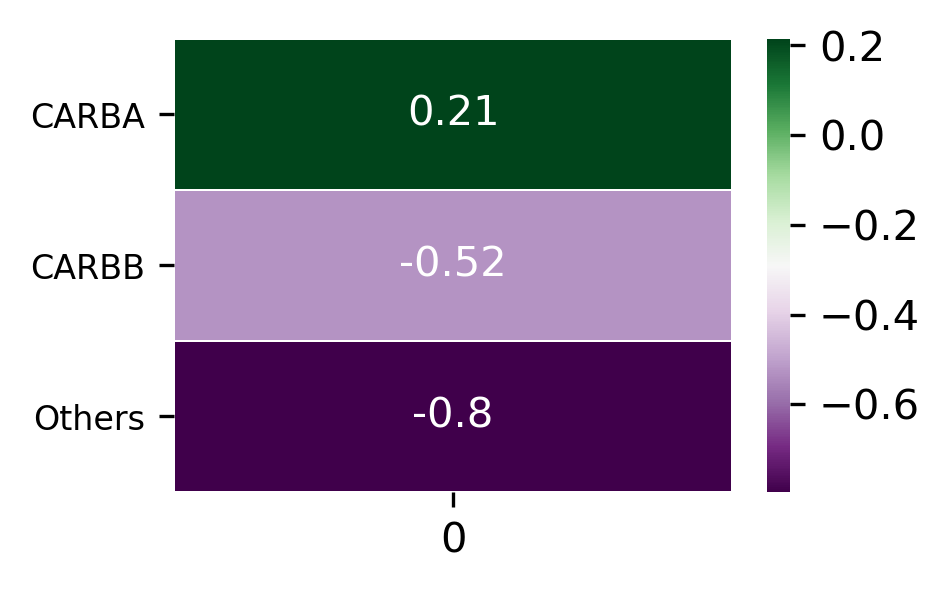

In [5]:
regionCC= pickle.load(open("clusteringCoefRegion.pickle",'rb'))
regionMon=pickle.load(open("monitoringSitesRegion.pickle",'rb'))

regionC={}
for index1,index2 in zip(["CARBA","CARBB","Others"],["A","B","O"]):
    x1=[regionCC[i][index1] for i in regionCC]
    y1=[regionMon[i][index2] for i in regionMon]
    regionC[index1]=np.corrcoef(x1,y1)[0][1]
    
plt.close()
plt.subplots(figsize=(3,2),dpi=300) 

temp = [[regionC[i] for i in regionC]]
t = list(map(list, zip(*temp)))

sns.heatmap(t,linewidth=0.1,cmap=plt.get_cmap('PRGn'),annot=True)
plt.yticks([i+0.5 for i in range(len(regionC))],[i for i in regionC],size=8,rotation=0)
#plt.xticks(list(range(len(yearMap)))[::3],list(yearMap)[::3],size=6)
plt.show()

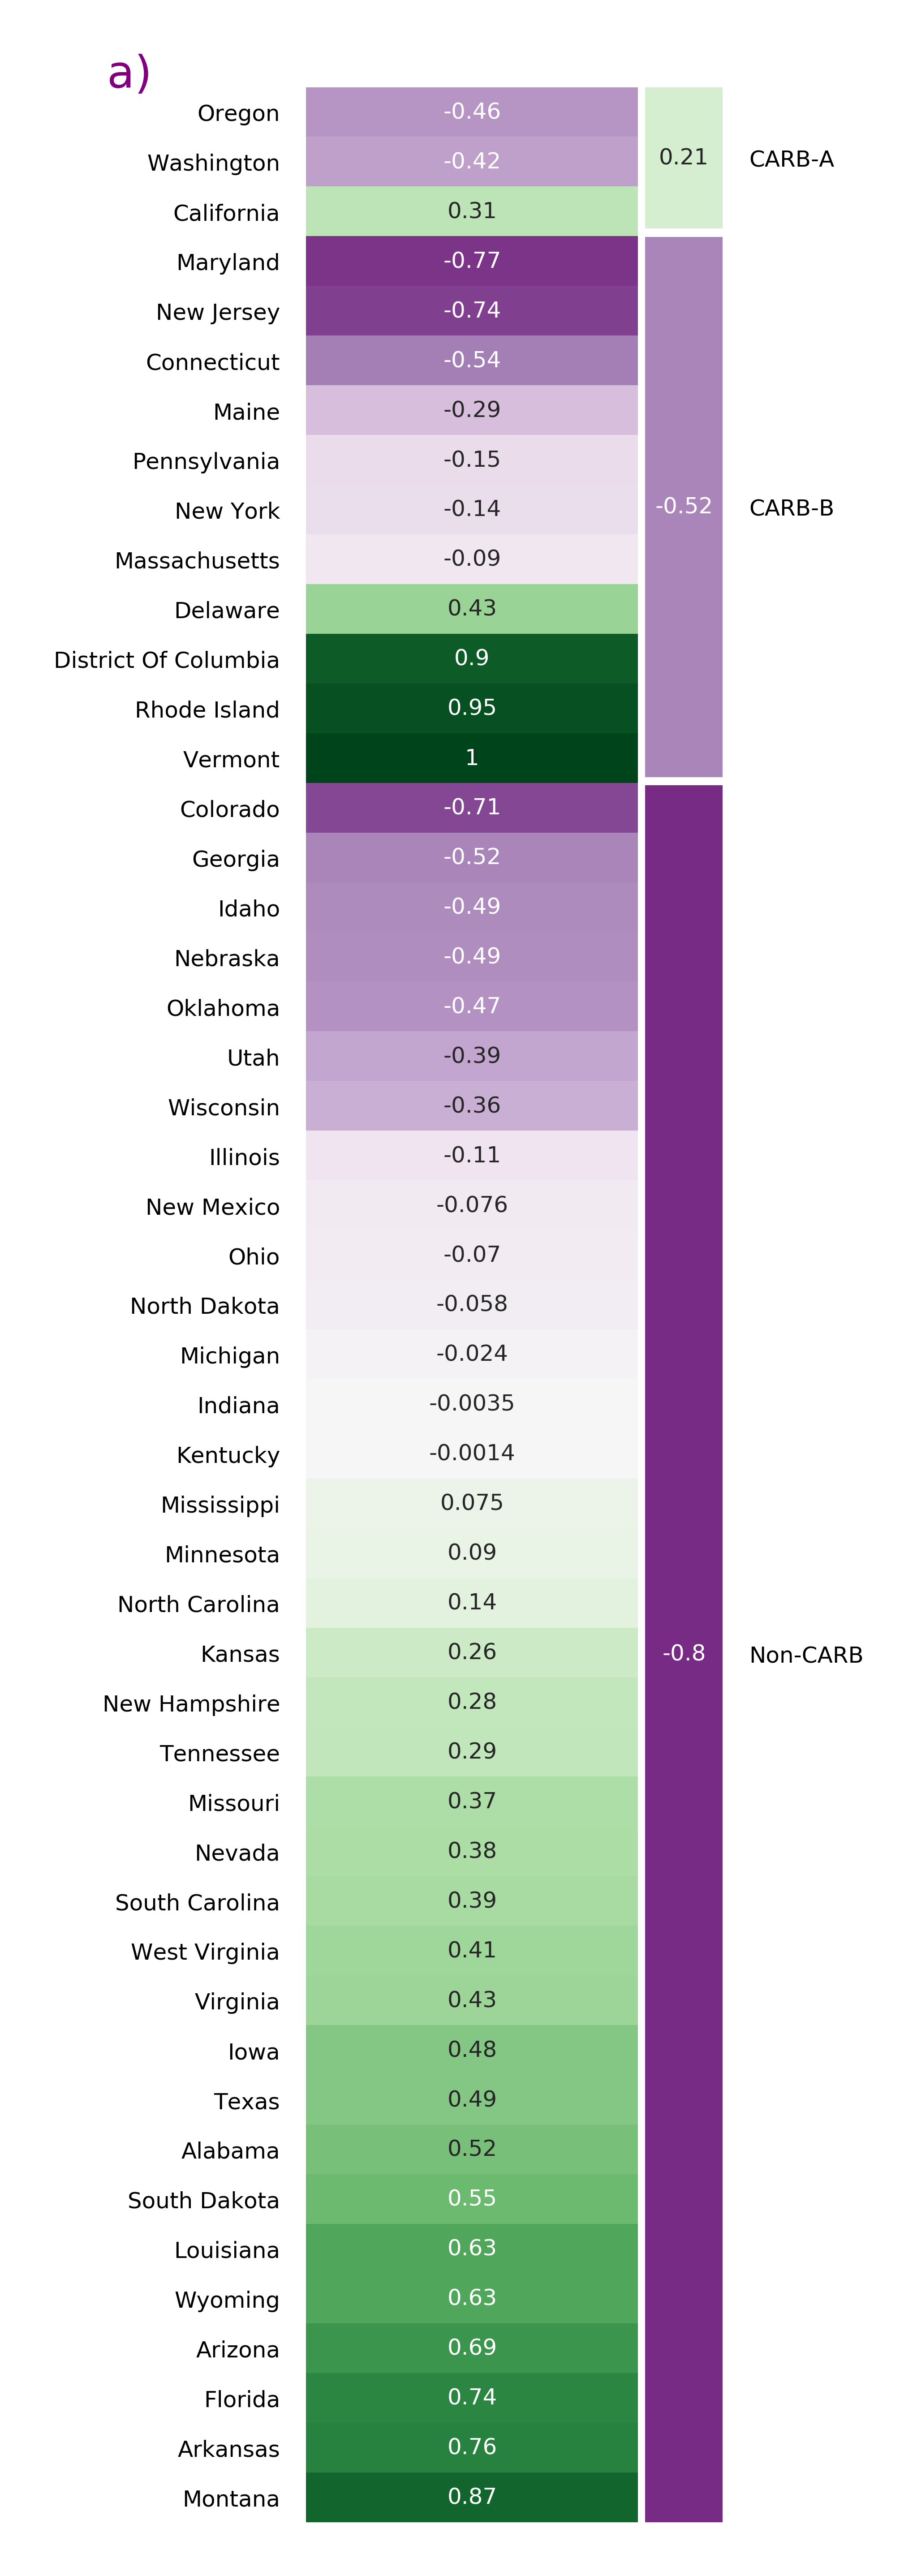

In [6]:
# Figure - 7a

cmap =plt.get_cmap('PRGn')

plt.close()
plt.figure(figsize = (1,6), dpi = 1200)
n = len(carbA)+len(carbB)+len(nonCarb)
gs = gridspec.GridSpec(n,10)   

ax=plt.subplot(gs[0:len(carbA),8:10])
ax.tick_params(axis=u'both', which=u'both',length=0)
sns.heatmap([t[0]],cbar=False,vmax=1,vmin=-1,annot=True,cmap=cmap,annot_kws={"size":3})
plt.xticks([])
ax.yaxis.tick_right()
plt.yticks([0.5],['CARB-A'],size=3,rotation=0)

ax=plt.subplot(gs[len(carbA):len(carbA)+len(carbB),8:10])
ax.tick_params(axis=u'both', which=u'both',length=0)
sns.heatmap([t[1]],cbar=False,vmax=1,vmin=-1,annot=True,cmap=cmap,annot_kws={"size":3})
plt.xticks([])
ax.yaxis.tick_right()
plt.yticks([0.5],['CARB-B'],size=3,rotation=0)

ax=plt.subplot(gs[len(carbA)+len(carbB):len(carbA)+len(carbB)+len(nonCarb),8:10])
ax.tick_params(axis=u'both', which=u'both',length=0)
sns.heatmap([t[2]],cbar=False,vmax=1,vmin=-1,annot=True,cmap=cmap,annot_kws={"size":3})
plt.xticks([])
ax.yaxis.tick_right()
plt.yticks([0.5],['Non-CARB'],size=3,rotation=0)


ax=plt.subplot(gs[0:n,0:8])
ax.text(-0.6, 1, 'a)', transform=ax.transAxes, size=6,color='purple')

ax.tick_params(axis=u'both', which=u'both',length=0)

tempx={}
for i in data:
    intI = int(i)
    if intI in carbA:
        key='CARB-A'
    elif intI in carbB:
        key='CARB-B'
    elif intI in nonCarb:
        key='Non-CARB'
    if intI in carbA+carbB+nonCarb:   
        if key not in tempx:
            tempx[key]={}
        tempx[key][intI]=data[i][-1]
        
x1 = sortByValue(tempx['CARB-A'])
x2 = sortByValue(tempx['CARB-B'])
x3 = sortByValue(tempx['Non-CARB'])

corList = [[i[1]]for i in x1]
corList.extend([[i[1]]for i in x2])
corList.extend([[i[1]]for i in x3])

xticks = [i[0]for i in x1]
xticks.extend([i[0] for i in x2])
xticks.extend([i[0] for i in x3])
xticks = [stateCodes[i].replace('"','') for i in xticks]

sns.heatmap(corList,cbar=False,vmax=1,vmin=-1,annot=True,cmap=cmap,annot_kws={"size":3})


plt.yticks(list(map(lambda x:x+0.5,range(n))),xticks,size=3,rotation=0)
plt.xticks([])

plt.savefig("Com/images/Figure7a.png",bbox_inches='tight')
plt.show()

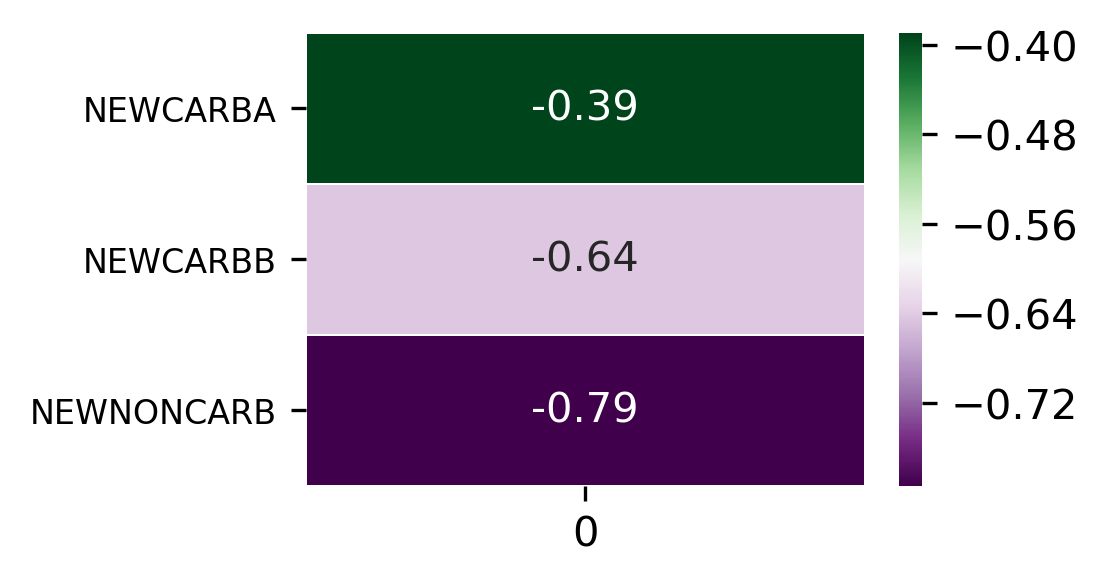

In [7]:
regionCC= pickle.load(open("clusteringCoefRegion_newcarb.pickle",'rb'))
regionMon=pickle.load(open("monitoringSitesRegion_newcarb.pickle",'rb'))

regionC={}
for index1,index2 in zip(["NEWCARBA","NEWCARBB","NEWNONCARB"],["A","B","O"]):
    x1=[regionCC[i][index1] for i in regionCC]
    y1=[regionMon[i][index2] for i in regionMon]
    regionC[index1]=np.corrcoef(x1,y1)[0][1]
    
plt.close()
plt.subplots(figsize=(3,2),dpi=300) 

temp = [[regionC[i] for i in regionC]]
t = list(map(list, zip(*temp)))

sns.heatmap(t,linewidth=0.1,cmap=plt.get_cmap('PRGn'),annot=True)
plt.yticks([i+0.5 for i in range(len(regionC))],[i for i in regionC],size=8,rotation=0)
#plt.xticks(list(range(len(yearMap)))[::3],list(yearMap)[::3],size=6)
plt.show()


OrderedDict([('Non-CARB', {1: 0.5202181997205594, 4: 0.6939745364524125, 5: 0.760976141010841, 12: 0.7441711842848158, 17: -0.10601027571122548, 18: -0.0035363035757406415, 19: 0.4847844797854714, 20: 0.2572453787952506, 21: -0.0013843287639480294, 22: 0.6299037843331443, 26: -0.023679547857055654, 27: 0.08974971499391038, 28: 0.07534653589571268, 29: 0.3738030852227937, 30: 0.8724254502027327, 32: 0.3788395073615985, 33: 0.2837130455729388, 35: -0.07574101907776483, 37: 0.1360879618650566, 38: -0.058384609883744595, 39: -0.06956581484872745, 45: 0.39380124350287277, 46: 0.5541570345870609, 47: 0.2904344692371214, 48: 0.4879099999617319, 51: 0.42795181112695657, 54: 0.41442695274077357, 55: -0.35826050109687896, 56: 0.6326027420028163, 80: 0.8349578098487025}), ('CARB-A', {6: 0.30864520675629226, 8: -0.7130722910816485, 16: -0.49437982966644156, 31: -0.49176091544475, 40: -0.47479846733299363, 41: -0.4568122955299568, 49: -0.3923810875658378, 53: -0.41854454234128935}), ('CARB-B', {9: 

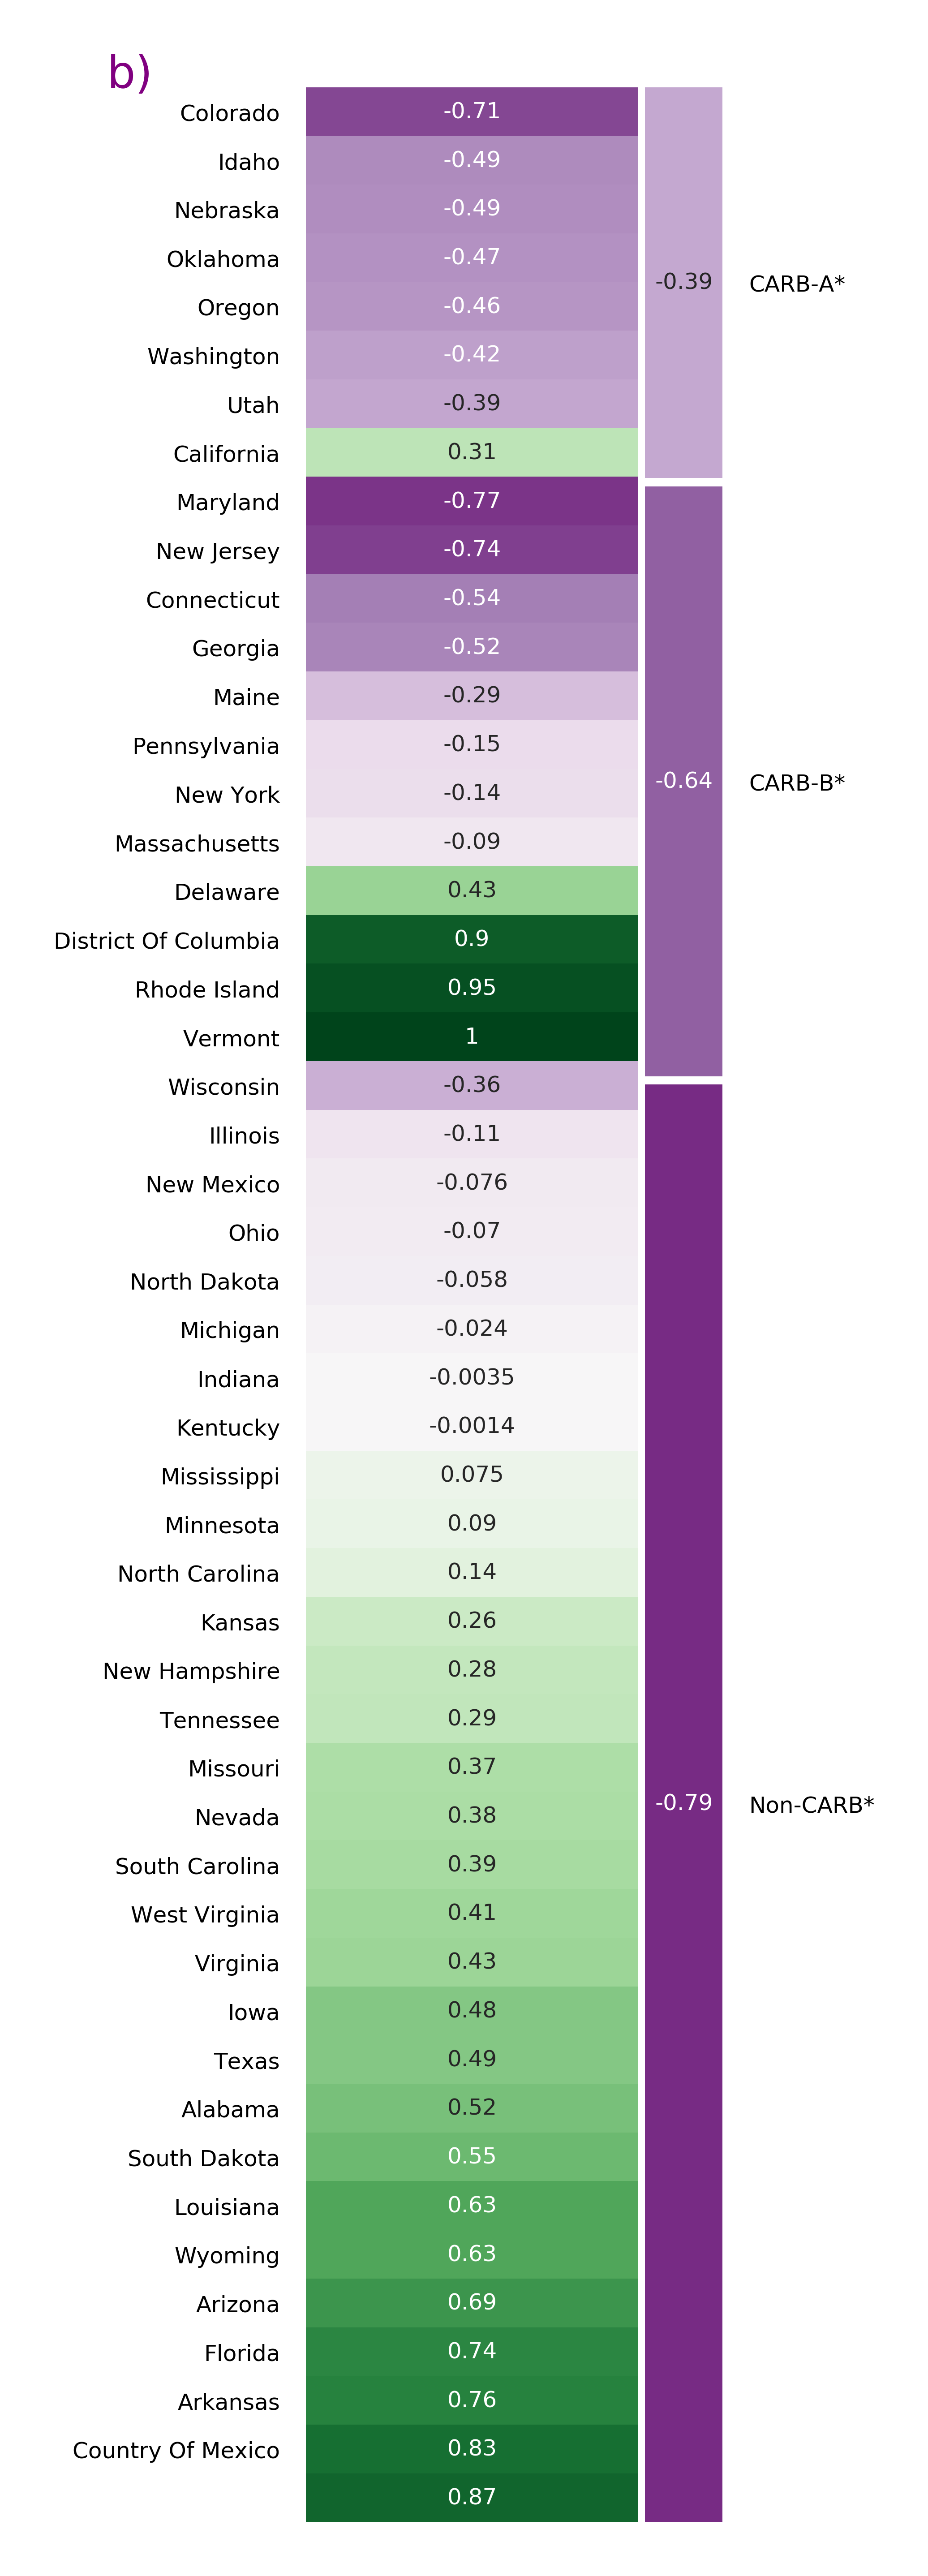

In [8]:
# Figure - 7b

newcarbA=[6,41,53,8,16,31,40,49]
newcarbB=[9,10,23,24,25,34,36,42,44,50,11,13]
noState = ['"Guam"','"Puerto Rico"','"Hawaii"','"Virgin Islands"','"Alaska"']
newnonCarb = [i for i in stateCodes if i not in newcarbA+newcarbB and stateCodes[i] not in noState]


cmap =plt.get_cmap('PRGn')

plt.close()
plt.figure(figsize = (1,6), dpi = 1200)

n = len(carbA)+len(carbB)+len(nonCarb)
gs = gridspec.GridSpec(n,10)   

ax=plt.subplot(gs[0:len(newcarbA),8:10])
ax.tick_params(axis=u'both', which=u'both',length=0)
sns.heatmap([t[0]],cbar=False,vmax=1,vmin=-1,annot=True,cmap=cmap,annot_kws={"size":3})
plt.xticks([])
ax.yaxis.tick_right()
plt.yticks([0.5],['CARB-A*'],size=3,rotation=0)

ax=plt.subplot(gs[len(newcarbA):len(newcarbA)+len(newcarbB),8:10])
ax.tick_params(axis=u'both', which=u'both',length=0)
sns.heatmap([t[1]],cbar=False,vmax=1,vmin=-1,annot=True,cmap=cmap,annot_kws={"size":3})
plt.xticks([])
ax.yaxis.tick_right()
plt.yticks([0.5],['CARB-B*'],size=3,rotation=0)

ax=plt.subplot(gs[len(newcarbA)+len(newcarbB):len(newcarbA)+len(newcarbB)+len(newnonCarb),8:10])
ax.tick_params(axis=u'both', which=u'both',length=0)
sns.heatmap([t[2]],cbar=False,vmax=1,vmin=-1,annot=True,cmap=cmap,annot_kws={"size":3})
plt.xticks([])
ax.yaxis.tick_right()
plt.yticks([0.5],['Non-CARB*'],size=3,rotation=0)


ax=plt.subplot(gs[0:n,0:8])
ax.text(-0.6, 1, 'b)', transform=ax.transAxes, size=6,color='purple')
ax.tick_params(axis=u'both', which=u'both',length=0)


xdict=OrderedDict()
tempx=OrderedDict()
for i in data:
    intI = int(i)
    if intI in newcarbA:
        xdict[intI] = 'CARB-A'
        key = 'CARB-A'
    elif intI in newcarbB:
        xdict[intI] = 'CARB-B' 
        key = 'CARB-B'
    elif intI in newnonCarb:
        xdict[intI] = 'Non-CARB'
        key = 'Non-CARB'
    if intI in newcarbA+newcarbB+newnonCarb:
        if key not in tempx:
            tempx[key]={}
        tempx[key][intI]=float(data[i][-1]) if data[i][-1]!=np.nan else data[i][-1]
        
print(tempx)

x1 = sortByValue(tempx['CARB-A'])
x2 = sortByValue(tempx['CARB-B'])
x3 = sortByValue(tempx['Non-CARB'])
# for i in data:
#     intI = int(i)
#     CC = data[i][-1]
#     if intI in nonCarb:
#         if CC <=-0.5:
#             xdict[intI] = 'CARB-Critical'
#             print(CC,stateCodes[intI],intI)
#         elif -0.25>= CC >-0.5:
#             xdict[intI]= 'CARB-Moderate'
#             print(CC,stateCodes[intI],intI)
# #t = list(map(list, zip(*x)))
# tempx={}
# for i in xdict:
#     key = xdict[i]
#     if key not in tempx:
#         tempx[key]=[]
#     tempx[key].append(i)
# print(tempx)

corList = [[i[1]]for i in x1]
corList.extend([[i[1]]for i in x2])
corList.extend([[i[1]]for i in x3])

xticks = [i[0]for i in x1]
xticks.extend([i[0] for i in x2])
xticks.extend([i[0] for i in x3])
sns.heatmap(corList,cbar=False,vmax=1,vmin=-1,annot=True,cmap=cmap,annot_kws={"size":3})


plt.yticks(list(map(lambda x:x+0.5,range(n))),[stateCodes[i].replace('"','') for i in xticks],size=3,rotation=0)
plt.xticks([])

plt.savefig("Com/images/Figure7b.png",bbox_inches='tight',dpi=1200)

plt.show()

In [9]:
plt.figure?

In [10]:
x[0]

2

In [11]:
stateCodes

OrderedDict([(1, '"Alabama"'),
             (2, '"Alaska"'),
             (4, '"Arizona"'),
             (5, '"Arkansas"'),
             (6, '"California"'),
             (8, '"Colorado"'),
             (9, '"Connecticut"'),
             (10, '"Delaware"'),
             (11, '"District Of Columbia"'),
             (12, '"Florida"'),
             (13, '"Georgia"'),
             (15, '"Hawaii"'),
             (16, '"Idaho"'),
             (17, '"Illinois"'),
             (18, '"Indiana"'),
             (19, '"Iowa"'),
             (20, '"Kansas"'),
             (21, '"Kentucky"'),
             (22, '"Louisiana"'),
             (23, '"Maine"'),
             (24, '"Maryland"'),
             (25, '"Massachusetts"'),
             (26, '"Michigan"'),
             (27, '"Minnesota"'),
             (28, '"Mississippi"'),
             (29, '"Missouri"'),
             (30, '"Montana"'),
             (31, '"Nebraska"'),
             (32, '"Nevada"'),
             (33, '"New Hampshire"'),
         

In [12]:
newnonCarb

[1,
 4,
 5,
 12,
 17,
 18,
 19,
 20,
 21,
 22,
 26,
 27,
 28,
 29,
 30,
 32,
 33,
 35,
 37,
 38,
 39,
 45,
 46,
 47,
 48,
 51,
 54,
 55,
 56,
 80]

In [13]:
stateCodes

OrderedDict([(1, '"Alabama"'),
             (2, '"Alaska"'),
             (4, '"Arizona"'),
             (5, '"Arkansas"'),
             (6, '"California"'),
             (8, '"Colorado"'),
             (9, '"Connecticut"'),
             (10, '"Delaware"'),
             (11, '"District Of Columbia"'),
             (12, '"Florida"'),
             (13, '"Georgia"'),
             (15, '"Hawaii"'),
             (16, '"Idaho"'),
             (17, '"Illinois"'),
             (18, '"Indiana"'),
             (19, '"Iowa"'),
             (20, '"Kansas"'),
             (21, '"Kentucky"'),
             (22, '"Louisiana"'),
             (23, '"Maine"'),
             (24, '"Maryland"'),
             (25, '"Massachusetts"'),
             (26, '"Michigan"'),
             (27, '"Minnesota"'),
             (28, '"Mississippi"'),
             (29, '"Missouri"'),
             (30, '"Montana"'),
             (31, '"Nebraska"'),
             (32, '"Nevada"'),
             (33, '"New Hampshire"'),
         

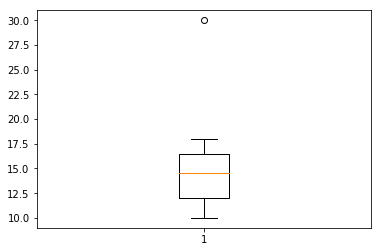

In [14]:
a=plt.boxplot([15, 10, 12, 14, 30, 16, 12, 18])
plt.show()

In [15]:
a['medians']

In [16]:
a.keys()

dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])

In [17]:
a['whiskers']

In [18]:
np.percentile([15, 10, 12, 14, 30, 16, 12, 18],75)

16.5

In [19]:
np.median([15, 10, 12, 14, 30, 16, 12, 18])

14.5

In [20]:
n

49